### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

### Basic Info

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

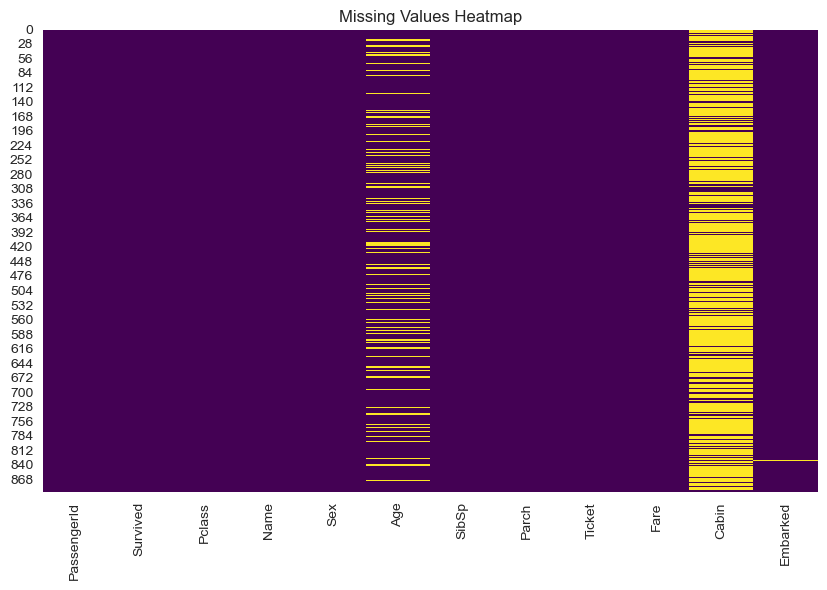

In [9]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### Data Cleaning

In [10]:
# Fill Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop deck column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

# Drop rows with missing 'embark_town'
df.dropna(subset=["Embarked"], inplace=True)

print("\n Missing values after cleaning:")
print(df.isnull().sum())


 Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Univariate Analysis (Single column)

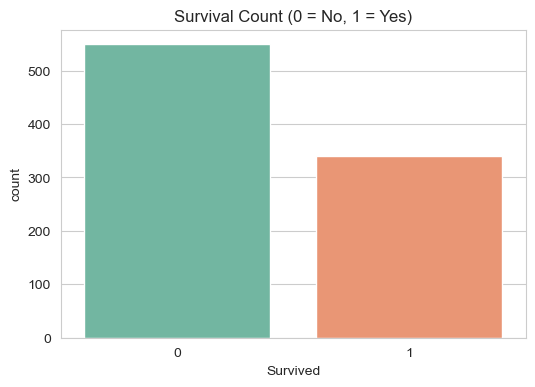

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Survived", data=df, palette="Set2", legend=False)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()


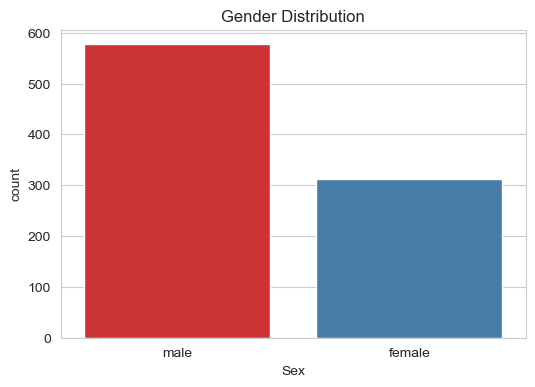

In [12]:
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Sex", data=df, palette="Set1")
plt.title("Gender Distribution")
plt.show()

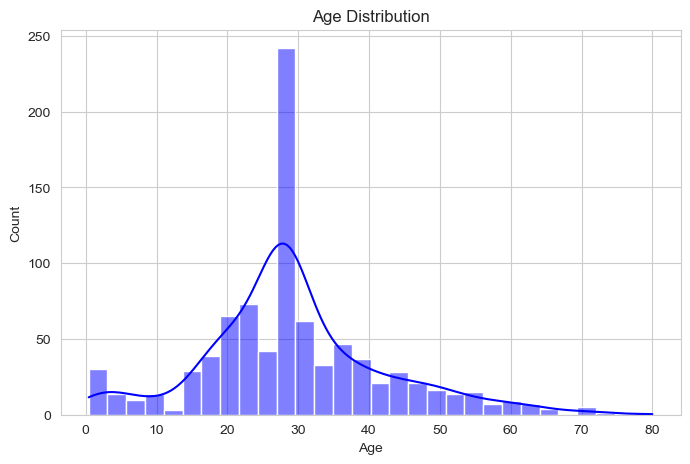

In [13]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

### Bivariate Analysis (Relationship)

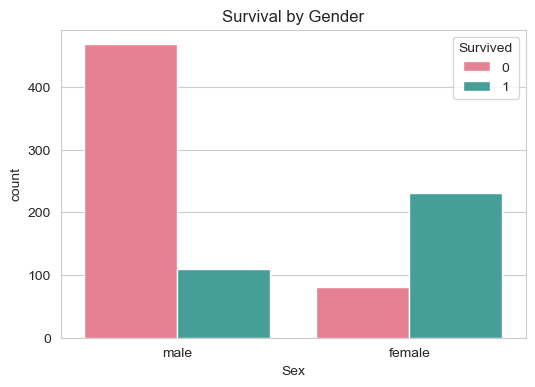

In [14]:
# Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="husl")
plt.title("Survival by Gender")
plt.show()

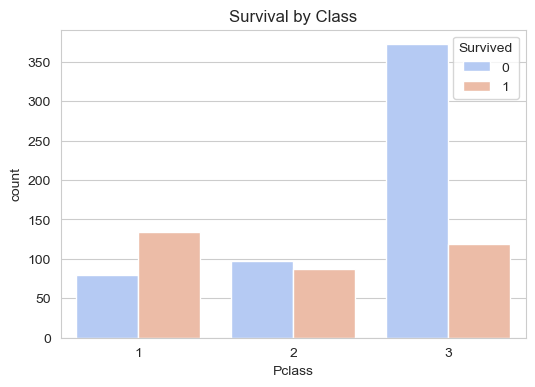

In [15]:
# Survival by Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival by Class")
plt.show()

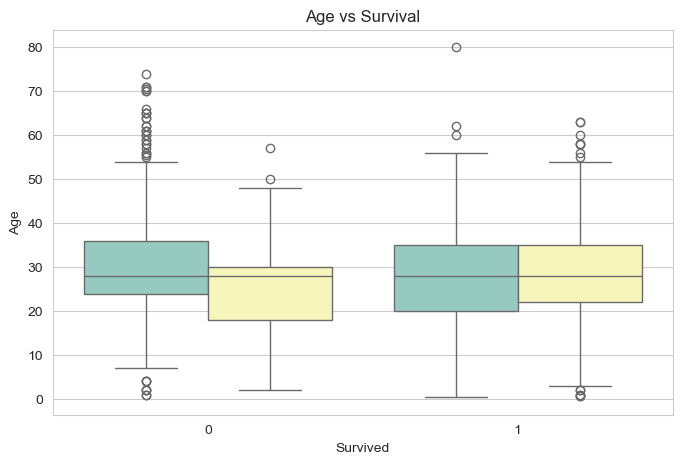

In [16]:
# Age vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Age", hue="Sex", data=df, palette="Set3", legend=False)
plt.title("Age vs Survival")
plt.show()

### Multivariate Analysis

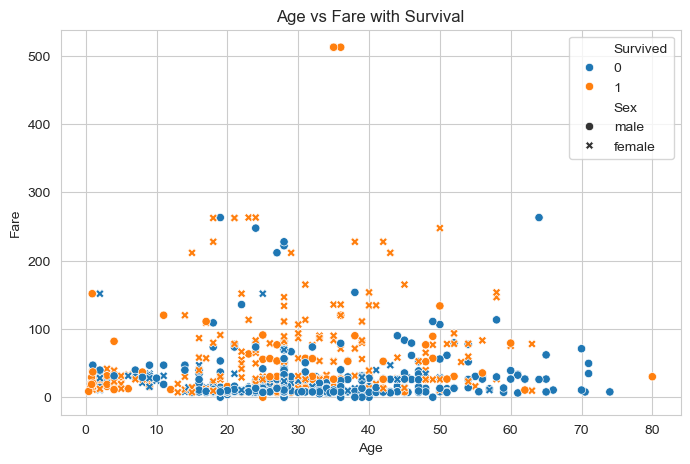

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Fare", hue="Survived", style="Sex", data=df)
plt.title("Age vs Fare with Survival")
plt.show()

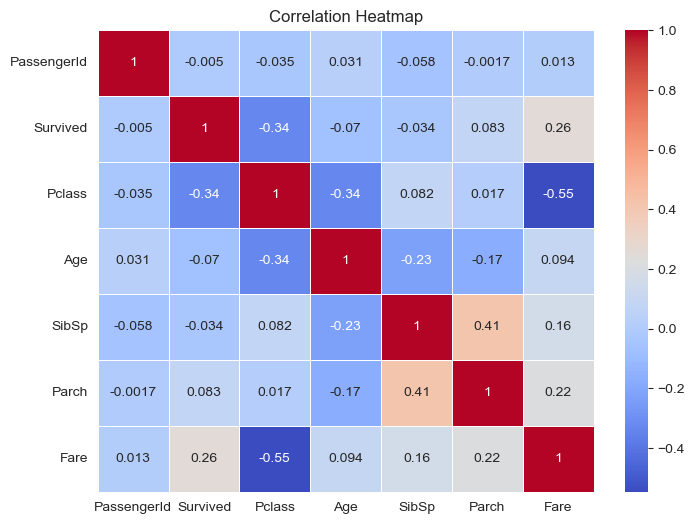

In [18]:
#Correlation Heatmap (only numeric features)
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=["int64","float64"]).corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Feature Engineering

In [19]:
# Create FamilySize = sibsp + parch + 1
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [20]:
# Create IsAlone feature
df["IsAlone"] = 1
df.loc[df["FamilySize"] > 1, "IsAlone"] = 0

In [21]:
print("\n Feature Engineering Done:")
print(df[["FamilySize", "IsAlone"]].head())


 Feature Engineering Done:
   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1


### Insights / Observations

In [22]:
print("\n Observations / Insights:")
print("1. Women had much higher survival rate than men.")
print("2. Passengers in higher class (1st) had better survival chances.")
print("3. Younger passengers had slightly higher survival rates.")
print("4. Traveling alone reduced chances of survival.")
print("5. Fare is positively correlated with survival (wealthier passengers survived more).")


 Observations / Insights:
1. Women had much higher survival rate than men.
2. Passengers in higher class (1st) had better survival chances.
3. Younger passengers had slightly higher survival rates.
4. Traveling alone reduced chances of survival.
5. Fare is positively correlated with survival (wealthier passengers survived more).
